In [1]:
import numpy as np
from matplotlib import pyplot as plt
import superrad 

In [2]:
Phi_s=10**(-3)
logMass_s=8.4
alpha=-1.19

# Data extraction

Text(0.5, 1.0, 'Black Hole Mass Functions for z=0.5')

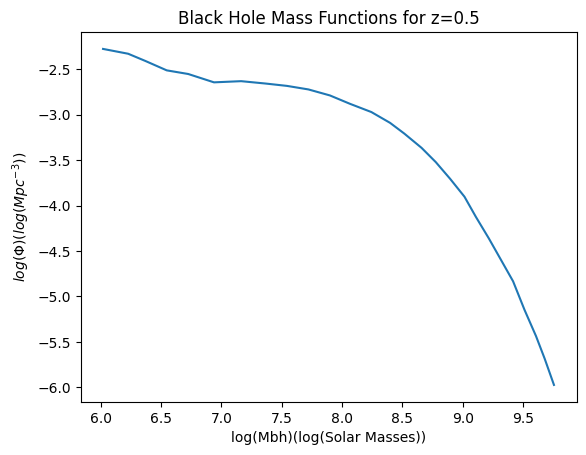

In [3]:
X_1=[6.018,6.226,6.368,6.546,6.724,6.938,7.163,7.365,7.543,7.721,7.899,8.065,8.243,8.398,8.516,8.659,8.777,8.896,9.015,9.11,
9.217,9.312,9.418,9.513,9.608,9.68,9.757]
Y_1=[-2.275,-2.328,-2.407,-2.511,-2.551,-2.643,-2.63,-2.656,-2.682,-2.721,-2.787,-2.879,-2.97,-3.089,-3.207,-3.364,-3.521,
   -3.705,-3.902,-4.125,-4.361,-4.584,-4.833,-5.148,-5.436,-5.685,-5.974]

plt.plot(X_1,Y_1)
plt.xlabel('log(Mbh)(log(Solar Masses))')
plt.ylabel(r'$log(\Phi)(log(Mpc^{-3}))$')
plt.title('Black Hole Mass Functions for z=0.5')

Text(0.5, 1.0, 'Black Hole Mass Functions (BHMFs)')

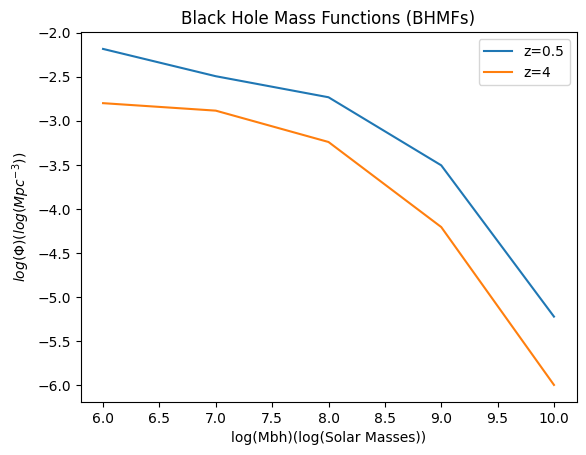

In [5]:
X=[6,7,8,9,10]
Y_4=[-2.8,-2.885,-3.241,-4.207,-6]
Y_05=[-2.184,-2.494,-2.733,-3.506,-5.224]

plt.plot(X,Y_05,label='z=0.5')
plt.plot(X,Y_4,label='z=4')
plt.legend()
plt.xlabel('log(Mbh)(log(Solar Masses))')
plt.ylabel(r'$log(\Phi)(log(Mpc^{-3}))$')
plt.title('Black Hole Mass Functions (BHMFs)')

# Coefficients determination

In [6]:
M=10**6
z1=0.5
z2=4


beta1=(Y_05[0]-Y_4[0])/((z1-z2)*np.log(M/10**(logMass_s)))
beta2=-(Y_05[0]-Y_4[0])/(np.log(z1+1)-np.log(z2+1))
print('beta1=',beta1)
print('beta2=',beta2)


beta1= 0.03184826200623844
beta2= 0.5116394637708428


Text(0.5, 1.0, 'Black Hole Mass Function (BHMF)')

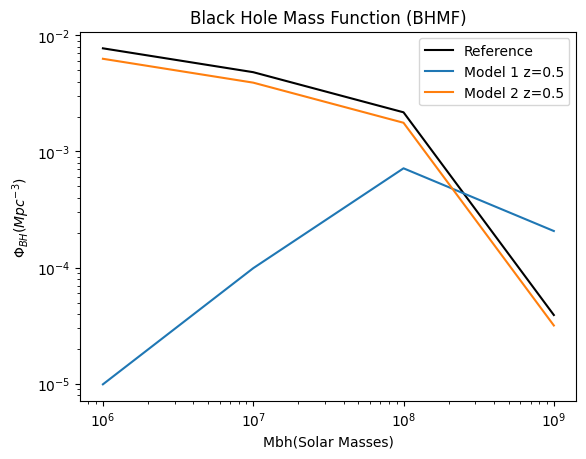

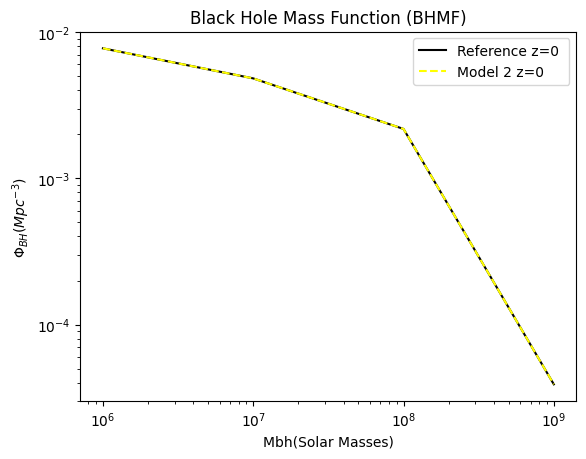

In [10]:
Phi_s=10**(-3)
logMass_s=8.4
alpha=-1.19

def Schechter(M):
    return Phi_s*(M/10**(logMass_s))**(1+alpha)*np.exp(1-(M/10**(logMass_s)))

def Phi_1(M,z):
    alpha_z=beta1*z
    return Phi_s*(M/10**(logMass_s))**(1+alpha_z)*np.exp(1-(M/10**(logMass_s)))

def Phi_2(M,z):
    return (1/(z+1))**(beta2)*Phi_s*(M/10**(logMass_s))**(1+alpha)*np.exp(1-(M/10**(logMass_s)))
    
M=10**np.arange(6,10,1)
plt.loglog(M,Schechter(M),c='black',label='Reference')
plt.loglog(M,Phi_1(M,0.5), label='Model 1 z=0.5')
plt.loglog(M,Phi_2(M,0.5),label='Model 2 z=0.5')
plt.legend()
plt.xlabel('Mbh(Solar Masses)')
plt.ylabel(r'$\Phi_{BH} (Mpc^{-3})$')
plt.title('Black Hole Mass Function (BHMF)')

plt.figure()
plt.loglog(M,Schechter(M),c='black',label='Reference z=0 ')
plt.loglog(M,Phi_2(M,0),ls='--', c='yellow',label='Model 2 z=0')
plt.legend()
plt.xlabel('Mbh(Solar Masses)')
plt.ylabel(r'$\Phi_{BH} (Mpc^{-3})$')
plt.title('Black Hole Mass Function (BHMF)')

Text(0.5, 1.0, 'Black Hole Mass Function (BHMF)')

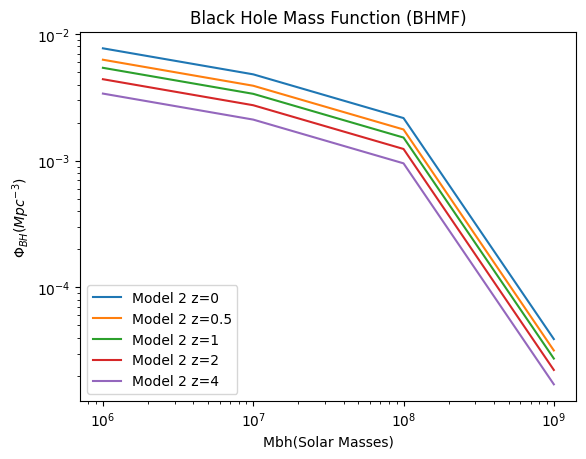

In [11]:
plt.figure()
plt.loglog(M,Phi_2(M,0),label='Model 2 z=0')
plt.loglog(M,Phi_2(M,0.5),label='Model 2 z=0.5')
plt.loglog(M,Phi_2(M,1),label='Model 2 z=1')
plt.loglog(M,Phi_2(M,2),label='Model 2 z=2')
plt.loglog(M,Phi_2(M,4),label='Model 2 z=4')
plt.legend()

plt.xlabel('Mbh(Solar Masses)')
plt.ylabel(r'$\Phi_{BH}(Mpc^{-3})$')
plt.title('Black Hole Mass Function (BHMF)')

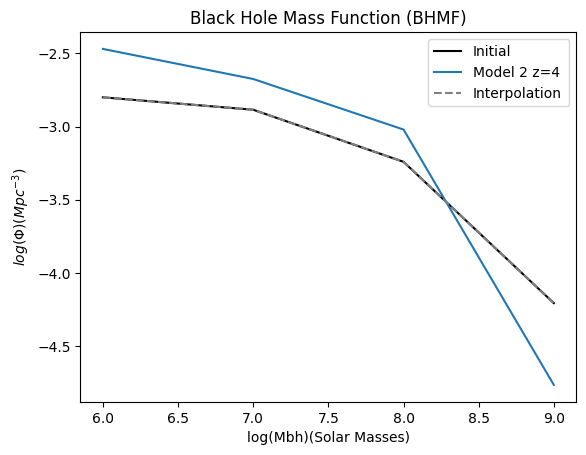

In [156]:
plt.plot(X[:4],Y_4[:4],c='black',label='Initial')
plt.plot(np.log10(M),np.log10(Phi_2(M,4)),label='Model 2 z=4 ')
p_4=np.poly1d(np.polyfit(X[:4],Y_4[:4],3))
plt.plot(X[:4],p_4(X[:4]),c='gray',ls='--',label='Interpolation')

plt.xlabel('log(Mbh)(Solar Masses)')
plt.ylabel(r'$log(\Phi)(Mpc^{-3})$')
plt.title('Black Hole Mass Function (BHMF)')
plt.legend()

Text(0.5, 1.0, 'Black Hole Mass Function (BHMF)')

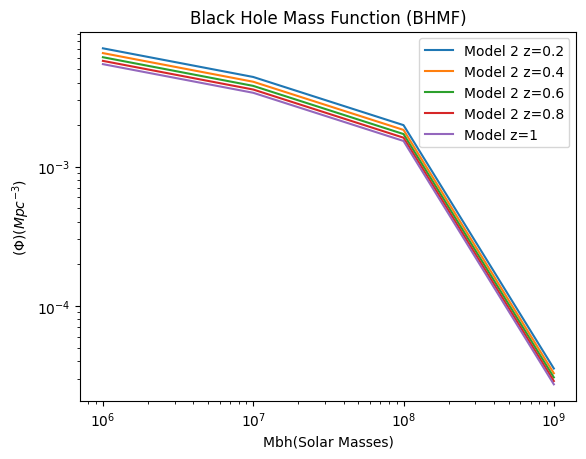

In [157]:
plt.figure()
plt.loglog(M,Phi_2(M,0.2),label='Model 2 z=0.2')
plt.loglog(M,Phi_2(M,0.4),label='Model 2 z=0.4')
plt.loglog(M,Phi_2(M,0.6),label='Model 2 z=0.6')
plt.loglog(M,Phi_2(M,0.8),label='Model 2 z=0.8')
plt.loglog(M,Phi_2(M,1),label='Model z=1')
plt.legend()
plt.xlabel('Mbh(Solar Masses)')
plt.ylabel(r'$(\Phi)(Mpc^{-3})$')
plt.title('Black Hole Mass Function (BHMF)')

# SNR distribution 

In [99]:
d_source=8*10**np.arange(3,8,1)
print(d_source)

[    8000    80000   800000  8000000 80000000]


In [100]:
G=6.6740e-11
c=299792458.0
t_rot=62e-6 #time or rotation for M=1msun


#d_source=[0.1*z,0.2*z,0.3*z,0.4*z,0.5*z,0.6*z,0.7*z,0.8*z,0.9*z,1*z]
mass_BH=10**(np.arange(5,10,1))
chi=[]
             
def rg(M):
    return (G*(M*2*10**30))/c**2
            
def J(M):
    return M*2*10**30*(2*np.pi*rg(M)**2)/(t_rot*M)
     
def a(M):
    return J(M)/(M*2*10**30*c)          
             
for i in range(len(mass_BH)):
    chi.append((a(mass_BH[i])*c**2)/(G*mass_BH[i]*2*10**30))
 
print(chi) 
print(d_source)

[0.5020445628910765, 0.5020445628910766, 0.5020445628910762, 0.5020445628910762, 0.5020445628910766]
[    8000    80000   800000  8000000 80000000]


In [ ]:
import gwaxion
import multiprocessing
from functools import partial

def get_peak(a, lgw=2, **kwargs): 
    cloud = gwaxion.BosonCloud.from_parameters(1, 1, 0, alpha=a, evolve_params={'y_0': 1E-8}, **kwargs) 
    return cloud.gw(lgw).h0r, cloud.gw(lgw).f

alpha_best_dfixed=[]


alphas = np.arange(0.01, 0.25, 0.001)

for d in range (len(d_source)):
    distance =  d_source[d]* gwaxion.PC_SI
    for b in range (len(mass_BH)):
        bh = gwaxion.BlackHole(mass=mass_BH[b], chi=chi[b], msun=True)
        # collect peak values
        pool = multiprocessing.Pool(8)
        h0r_fs = pool.map(partial(get_peak, m_bh=bh.mass_msun, chi_bh=bh.chi), alphas)
        h0rs_num, fgws_num = np.array(h0r_fs).T
        
        # h0rs are the amplitudes 1m away from the source, so rescale by actual distance
        h0s_num = h0rs_num / distance
    
        best = max(zip(h0s_num, alphas))
        alpha_best_dfixed.append(best[1])

        
alpha_bestd_tot=[]
for i in range(len(d_source)):
    alpha_bestd_tot.append([])

for i in range(len(mass_BH)):
     alpha_bestd_tot[i]= alpha_best_dfixed[0+len(mass_BH)*i:(i+1)*len(mass_BH)]

In [88]:
print(alpha_bestd_tot[0])

[0.11699999999999991, 0.11699999999999991, 0.11499999999999991, 0.1189999999999999, 0.10999999999999992]


In [101]:
import ldc
from ldc.lisa.noise import get_noise_model
from ldc.lisa.noise import NumericNoise
AddLDC = True

Tobs=3.0e7
L_m = 2.5e9
L = L_m/c

import ldc
from ldc.lisa.noise import get_noise_model
from ldc.lisa.noise import NumericNoise
AddLDC = True


def SNRc_theo(h0,Tobs,Sh_theo):
    return 5*((2/5*h0)**2*Tobs/Sh_theo)

SNR_theo_d=[]
for d in range (len(d_source)):
    distance =  d_source[d]* gwaxion.PC_SI
    for b in range (len(mass_BH)):
        
        bhb = gwaxion.BlackHoleBoson.from_parameters(m_bh=mass_BH[b], alpha=alpha_bestd_tot[0][b], chi_bh=chi[b])
        bh = gwaxion.BlackHole(mass=mass_BH[b], chi=chi[b], msun=True)
        cloud = bhb.best_cloud()
        fgw=cloud.fgw
        h0 = bh.h0r_fit(fgw)/distance
        #print('GW frequency=',fgw)
        #print('h0= ',h0)
    
    
        omegaL = 2*np.pi*fgw*L
        PSD_fX2 = get_noise_model("SciRDv1",fgw).psd(option='X',tdi2=True)
        S_theoX2=(20/3)*(1+0.6*(omegaL)**2)*(PSD_fX2/((4*omegaL)**2*(np.sin(omegaL)**2)*(2*np.sin(2*omegaL))**2))
        SNR_theo_d.append(np.sqrt(SNRc_theo(h0,Tobs,S_theoX2)))

SNR_theo_dtot=[]

for i in range(len(d_source)):
    SNR_theo_dtot.append(SNR_theo_d)
    SNR_theo_dtot[i]=SNR_theo_d[0+len(mass_BH)*i:(i+1)*len(mass_BH)]

print(SNR_theo_dtot)
print(np.shape(SNR_theo_dtot))

[[278.1857460378243, 8409.58205604542, 4562.99498307736, 198.37713908454822, 3.4864727941457905], [27.818574603782423, 840.958205604542, 456.29949830773603, 19.83771390845482, 0.34864727941457907], [2.7818574603782427, 84.0958205604542, 45.629949830773604, 1.9837713908454822, 0.0348647279414579], [0.2781857460378243, 8.40958205604542, 4.562994983077361, 0.19837713908454824, 0.0034864727941457904], [0.027818574603782426, 0.8409582056045419, 0.45629949830773603, 0.019837713908454818, 0.0003486472794145791]]
(5, 5)


In [106]:
z_Pc=4.22e9
dz_source=[]

for i in (range(len(d_source))):
    dz_source.append((d_source[i]*1)/z_Pc)
    
print(dz_source)
    

[1.895734597156398e-06, 1.895734597156398e-05, 0.0001895734597156398, 0.0018957345971563982, 0.018957345971563982]


In [113]:
Phi_tot=[] 

for d in (dz_source):
    for M in (mass_BH):
        Phi_tot.append(Phi_2(M,d))
    
print(Phi_tot)

[0.01202599904218337, 0.007736866500769718, 0.004819527758026175, 0.0021746947863577064, 3.9024431664044174e-05, 0.012025894064055914, 0.007736798963615026, 0.004819485687093234, 0.0021746758028715393, 3.902409100945517e-05, 0.012024844431669493, 0.007736123687854556, 0.004819065037432084, 0.002174485994933726, 3.902068494670791e-05, 0.012014362973052296, 0.007729380493732376, 0.004814864498202621, 0.0021725906036794704, 3.8986672557041854e-05, 0.01191101172966819, 0.0076628899867943155, 0.004773445553749938, 0.0021539013114749202, 3.8651297215609525e-05]


In [116]:
dist_SNR=[]
for i in range(len(Phi_tot)):
    dist_SNR.append(SNR_theo_d[i]*Phi_tot[i])
    
print(dist_SNR)

[3.345461515399941, 65.06381369489193, 21.991480980675515, 0.4314097300997246, 0.00013605761930369156, 0.3345432311981236, 6.506324573564772, 2.199128901121957, 0.04314059642100489, 1.360564316207348e-05, 0.03345140319212755, 0.650575669487296, 0.21989369588926114, 0.0043136831065437, 1.360445564756313e-06, 0.003342224526827766, 0.06500085950443928, 0.021970202549495853, 0.00043099230835990494, 1.3592597320439673e-07, 0.0003313473684083021, 0.00644417021303956, 0.0021781208113753896, 4.27284780040851e-05, 1.3475669620066556e-08]


In [139]:
dist_SNR_dtot=[]

for i in range(len(dz_source)):
    dist_SNR_dtot.append(dist_SNR)
    dist_SNR_dtot[i]=dist_SNR[0+(len(mass_BH))*i:(i+1)*(len(mass_BH))]

print(dist_SNR_dtot)

[[3.345461515399941, 65.06381369489193, 21.991480980675515, 0.4314097300997246, 0.00013605761930369156], [0.3345432311981236, 6.506324573564772, 2.199128901121957, 0.04314059642100489, 1.360564316207348e-05], [0.03345140319212755, 0.650575669487296, 0.21989369588926114, 0.0043136831065437, 1.360445564756313e-06], [0.003342224526827766, 0.06500085950443928, 0.021970202549495853, 0.00043099230835990494, 1.3592597320439673e-07], [0.0003313473684083021, 0.00644417021303956, 0.0021781208113753896, 4.27284780040851e-05, 1.3475669620066556e-08]]


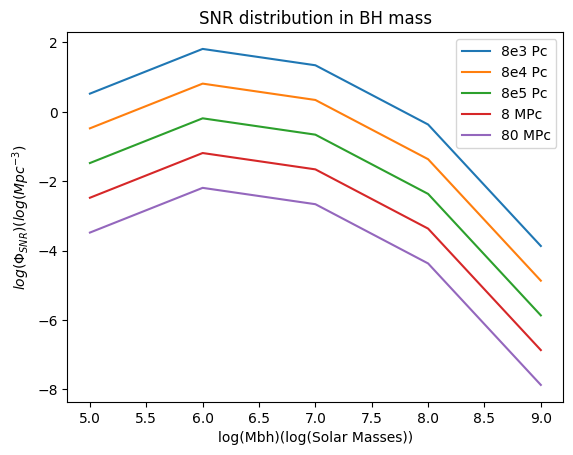

In [160]:
plt.plot(np.log10(mass_BH),np.log10(dist_SNR_dtot[0]),label='8e3 Pc')
plt.plot(np.log10(mass_BH),np.log10(dist_SNR_dtot[1]),label='8e4 Pc')
plt.plot(np.log10(mass_BH),np.log10(dist_SNR_dtot[2]),label='8e5 Pc')
plt.plot(np.log10(mass_BH),np.log10(dist_SNR_dtot[3]),label='8 MPc')
plt.plot(np.log10(mass_BH),np.log10(dist_SNR_dtot[4]),label='80 MPc')
    
plt.xlabel('log(Mbh)(log(Solar Masses))')
plt.ylabel(r'$log(\Phi_{SNR})(log(Mpc^{-3})$')
plt.title('SNR distribution in BH mass')
plt.legend()

In [166]:
dmin=d_source[0]
dmax=d_source[4]
N=len(d_source)

SNR_moyen=np.sum(dist_SNR)#*(dmax-dmin)/N
print('SNR_moy=',SNR_moyen)


SNR_moy= 100.92342949391782


In [172]:
from scipy import integrate as intg
SNR_ind=[]
SNR_ind.clear()
SNR_indbis=[]
I3=[]
x=d_source



for i in range(len(d_source)):
    SNR_ind.append(np.sum(dist_SNR_dtot[i])*(dmax-dmin)/N)
    SNR_indbis.append(np.sum(dist_SNR_dtot[i])*((dmax/z_Pc-dmin/z_Pc)/N))
    I3.append(intg.romb(dist_SNR_dtot[i]))

print(SNR_ind)
print(SNR_indbis)
print(I3)

print('SNR_moy=',np.mean(SNR_ind))
    
print('SNR_moy=',np.mean(SNR_indbis))

print('SNR_moy=',np.mean(I3))
    

[1453171499.975817, 145315881.48573157, 14530319.816633295, 1451765.4459778317, 143927.6913353969]
[0.3443534360132268, 0.03443504300609754, 0.003443203748017369, 0.0003440202478620455, 3.410608799416989e-05]
[105.91840463906551, 10.591748004928771, 1.0590823546283488, 0.10581592052325024, 0.010490565944819856]
SNR_moy= 322922678.883099
SNR_moy= 0.07652196182063958
SNR_moy= 23.537108297018143
